# Analyze 5' RACE

240405
  
1. Snakemake to get inserts
2. Table for supplementary information
3. Aligned views using heatmaps





In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar

In [2]:
import glob
import os
import seaborn as sns

In [3]:
# 5' RACE
sDataFolder = '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data'
sResultFolder = '/home/kwonschul/projects/u1promoter/results/240405_novaseq78_analysis'
sPrefix = '5RACE' # This is also the sample type. It should be either 3RACE or 5RACE.
sSuffix = '.count.top20v6.xlsx'
sInfoFile = '/home/kwonschul/projects/u1promoter/results/240405_novaseq78_analysis/240405_novaseq78_adaptor_v5.txt'

In [4]:
dfInfo = pd.read_table(sInfoFile, skiprows=3, encoding= 'unicode_escape')
dfInfo = dfInfo[dfInfo['Type'] == sPrefix] # Select 3' RACE or 5' RACE samples
dfInfo['Template'] = dfInfo.apply(lambda row: row['Plasmid_sequence'].upper(), axis=1) # for 5' RACE
dfInfo['StandardPos'] = dfInfo.apply(lambda row: row['Template'].find(row['Standard_terminal_sequence'].upper()) 
                                                                      + len(row['Standard_terminal_sequence']), axis=1)
dfInfo

,Type,Promoter,Experiment,Replicate,Standard_terminal_sequence,Sample_ID,Plasmid_name,Adaptor5_name,Adaptor5_seq,Adaptor3_name,Adaptor3_seq,Adaptor3_offset,Paired_end_fastq,Plasmid_sequence,Template,StandardPos
12,5RACE,U1,Exp1,Duplicate,GCACAACGTTTC,5RACE-A03-pEZ108,phU1-13bt1-EGFP12_30nt,oKW284.10x-TSO-RNA,AAGCAGTGGTATCAACGCAGAGTACAT,oKW706.5race.EGFP12R,GCTCACCATGGTGGCGAC,0,2 (reverse),GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,71
13,5RACE,U1,Exp1,Duplicate,GCACAACGTTTC,5RACE-A04-pEZ109,phU1-13bt1-EGFP12_50nt,oKW284.10x-TSO-RNA,AAGCAGTGGTATCAACGCAGAGTACAT,oKW706.5race.EGFP12R,GCTCACCATGGTGGCGAC,0,2 (reverse),GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,71
14,5RACE,U1,Exp2,Duplicate,GCACAACGTTTC,5RACE-B01-pEZ108,phU1-13bt1-EGFP12_30nt,oKW284.10x-TSO-RNA,AAGCAGTGGTATCAACGCAGAGTACAT,oKW706.5race.EGFP12R,GCTCACCATGGTGGCGAC,0,2 (reverse),GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,71
15,5RACE,U1,Exp2,.,GCACAACGTTTC,5RACE-B02-pEZ110,phU1-13bt1-EGFP12_30nt_G,oKW284.10x-TSO-RNA,AAGCAGTGGTATCAACGCAGAGTACAT,oKW706.5race.EGFP12R,GCTCACCATGGTGGCGAC,0,2 (reverse),GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,71
16,5RACE,U1,Exp2,.,GCACAACGTTTC,5RACE-B03-pEZ111,phU1-13bt1-EGFP12_30nt_C,oKW284.10x-TSO-RNA,AAGCAGTGGTATCAACGCAGAGTACAT,oKW706.5race.EGFP12R,GCTCACCATGGTGGCGAC,0,2 (reverse),GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,71
17,5RACE,U1,Exp2,.,GCACAACGTTTC,5RACE-B04-pEZ112,phU1-13bt1-EGFP12_30nt_T,oKW284.10x-TSO-RNA,AAGCAGTGGTATCAACGCAGAGTACAT,oKW706.5race.EGFP12R,GCTCACCATGGTGGCGAC,0,2 (reverse),GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,71
18,5RACE,U1,Exp2,Duplicate,GCACAACGTTTC,5RACE-B05-pEZ109,phU1-13bt1-EGFP12_50nt,oKW284.10x-TSO-RNA,AAGCAGTGGTATCAACGCAGAGTACAT,oKW706.5race.EGFP12R,GCTCACCATGGTGGCGAC,0,2 (reverse),GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,71
19,5RACE,U1,Exp2,.,GCACAACGTTTC,5RACE-B06-pEZ113,phU1-Psp13b-EGFP12_30nt,oKW284.10x-TSO-RNA,AAGCAGTGGTATCAACGCAGAGTACAT,oKW706.5race.EGFP12R,GCTCACCATGGTGGCGAC,0,2 (reverse),GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,71
20,5RACE,U1,Exp2,.,GCACAACGTTTC,5RACE-B07-pEZ114,phU1-Psp13b-EGFP12_50nt,oKW284.10x-TSO-RNA,AAGCAGTGGTATCAACGCAGAGTACAT,oKW706.5race.EGFP12R,GCTCACCATGGTGGCGAC,0,2 (reverse),GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...,71
21,5RACE,U6,Exp2,.,GGACGAAACACC,5RACE-B09-pEZ115,pU6-13bt1-EGFP12_30nt_G,oKW284.10x-TSO-RNA,AAGCAGTGGTATCAACGCAGAGTACAT,oKW706.5race.EGFP12R,GCTCACCATGGTGGCGAC,0,2 (reverse),ATATGCTTACCGTAACTTGAAAGTATTTCGATTTCTTGGCTTTATA...,ATATGCTTACCGTAACTTGAAAGTATTTCGATTTCTTGGCTTTATA...,71


In [5]:
#----------------------Variable ends--------------------------

In [6]:
dSample2Plasmid = dict(zip(dfInfo['Sample_ID'], dfInfo['Plasmid_sequence']))
dSample2Plasmid

{'5RACE-A03-pEZ108': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCACCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-A04-pEZ109': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCACACCACCCCGGTGAACAGCTCCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B01-pEZ108': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCACCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B02-pEZ110': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCGCCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B03-pEZ111': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCCCCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B04-pEZ112': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCTCCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B05-pEZ109': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCACACCACCCCGGTGAACAGCTCCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B06-pEZ113': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCAC

In [7]:
dSample2Template = dict(zip(dfInfo['Sample_ID'], dfInfo['Template']))
dSample2Template

{'5RACE-A03-pEZ108': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCACCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-A04-pEZ109': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCACACCACCCCGGTGAACAGCTCCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B01-pEZ108': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCACCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B02-pEZ110': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCGCCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B03-pEZ111': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCCCCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B04-pEZ112': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCTCCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B05-pEZ109': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCACAACGTTTCACACCACCCCGGTGAACAGCTCCTCGCCCTTGCTCACCATGGTGGCGAC',
 '5RACE-B06-pEZ113': 'GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTGTCGGGGCAGAGGCAC

In [8]:
dSample2StandardPos = dict(zip(dfInfo['Sample_ID'], dfInfo['StandardPos']))
dSample2StandardPos

{'5RACE-A03-pEZ108': 71,
 '5RACE-A04-pEZ109': 71,
 '5RACE-B01-pEZ108': 71,
 '5RACE-B02-pEZ110': 71,
 '5RACE-B03-pEZ111': 71,
 '5RACE-B04-pEZ112': 71,
 '5RACE-B05-pEZ109': 71,
 '5RACE-B06-pEZ113': 71,
 '5RACE-B07-pEZ114': 71,
 '5RACE-B09-pEZ115': 71}

In [9]:
lCountFiles = glob.glob(sDataFolder + '/*.count.txt')
lCountFiles

['/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-A03-pEZ108.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B03-pEZ111.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B02-pEZ110.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B01-pEZ108.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B04-pEZ112.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B06-pEZ113.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B05-pEZ109.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B09-pEZ115.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B07-pEZ114.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_no

In [10]:
dSample2File = {}
for sCountFile in lCountFiles:
    sName = sCountFile.split('/')[-1].split('.count')[0]
    dSample2File[sName] = sCountFile
dSample2File

{'5RACE-A03-pEZ108': '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-A03-pEZ108.count.txt',
 '5RACE-B03-pEZ111': '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B03-pEZ111.count.txt',
 '5RACE-B02-pEZ110': '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B02-pEZ110.count.txt',
 '5RACE-B01-pEZ108': '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B01-pEZ108.count.txt',
 '5RACE-B04-pEZ112': '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B04-pEZ112.count.txt',
 '5RACE-B06-pEZ113': '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B06-pEZ113.count.txt',
 '5RACE-B05-pEZ109': '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B05-pEZ109.count.txt',
 '5RACE-B09-pEZ115': '/home/kwonschul/projects/u1promoter/results/230727_novaseq8_analysis/data/5RACE-B09-pEZ115.count.txt',


In [11]:
lSamples = sorted(dSample2File.keys())
lSamples

['5RACE-A03-pEZ108',
 '5RACE-A04-pEZ109',
 '5RACE-B01-pEZ108',
 '5RACE-B02-pEZ110',
 '5RACE-B03-pEZ111',
 '5RACE-B04-pEZ112',
 '5RACE-B05-pEZ109',
 '5RACE-B06-pEZ113',
 '5RACE-B07-pEZ114',
 '5RACE-B09-pEZ115']

In [12]:
dSample2Count20 = {}
for sSample in lSamples:          
    
    sPlasmidSeq = dSample2Plasmid[sSample]
    sTemplateSeq = dSample2Template[sSample]
    nStandardPos = dSample2StandardPos[sSample]
    dfTemplateSeq = pd.DataFrame(['Template', 0, sTemplateSeq, 0, '.', '.', sPlasmidSeq, nStandardPos]).T
    dfTemplateSeq.columns = ['Type', 'Count', 'Seq', 'Percent', 'Label-1', 'Label-2', 'PlasmidSeq', 'StandardPos']

    sCountFile = dSample2File[sSample]
    dfCount = pd.read_table(sCountFile, header=None, sep='\s+', names=['Count','Seq'])

    # make a top 20 data frame
    dfCount20 = dfCount[:20] 
    nTop20_Count_Sum = dfCount20['Count'].sum()

    # percent is calculated using top 20 datasets
    dfCount20['Type'] = '.'
    dfCount20['Percent'] = dfCount20.apply(lambda row: row['Count'] / float(nTop20_Count_Sum) * 100, axis=1)
    dfCount20['Label-1'] = dfCount20.apply(lambda row: str(row['Seq']) + ' (' + str('%.1f' % (row['Percent'])) + '%)', axis=1)
    dfCount20['Label-2'] = dfCount20.apply(lambda row: f"{row['Count']:,}" + ' (' + str('%.1f' % (row['Percent'])) + '%)', axis=1)
    dfCount20['PlasmidSeq'] = '.'
    dfCount20['StandardPos'] = '.'
    
    
    dfCount20_with_template = pd.concat([dfTemplateSeq, dfCount20])

    # save for analysis
    dSample2Count20[sSample] = dfCount20_with_template
        
        
        

/tmp/ipykernel_479123/2718393771.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCount20['Type'] = '.'
/tmp/ipykernel_479123/2718393771.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCount20['Percent'] = dfCount20.apply(lambda row: row['Count'] / float(nTop20_Count_Sum) * 100, axis=1)
/tmp/ipykernel_479123/2718393771.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [13]:
def find_matched_pos_5race(sTemplate, sQuery, bTemplate):
    sTemplate = sTemplate.upper()
    sQuery = sQuery.upper()
    
    if bTemplate == True:
        return (['Template', np.nan])
    else:
        if sQuery == 'GGG': # RT primer + TSO
            return (['No insert', np.nan])
        elif sQuery[:3] != 'GGG': #weird or minor
            return (['Not perfectly matched', np.nan])
        else:
            if sTemplate.find(sQuery[3:]) == -1: # Terminal four G
                if sQuery[:4] != 'GGGG': #weird or minor
                    return (['Not perfectly matched', np.nan])
                elif sTemplate.find(sQuery[4:]) == -1:
                    return (['Not perfectly matched', np.nan])                
                else:
                    return (['4G', sTemplate.find(sQuery[4:])])
            else:
                return (['3G', sTemplate.find(sQuery[3:])])

def calculate_5end_pos(nMatchedPos, nStandardPos, bMatched, bTemplate):    
    if bTemplate == True:
        return np.nan
    elif bMatched == False:
        return np.nan
    else:
        return int(nMatchedPos) - nStandardPos +1 #To make the +1 position to be the first nucleotide of RNA


with pd.ExcelWriter(os.path.join(sResultFolder, sPrefix + sSuffix)) as f:
    dSample2CountMatched = {}
    
    for sSample in lSamples:
        print(sSample)
        dfCount20_with_template = dSample2Count20[sSample]
        dfCount20_with_template = dfCount20_with_template.reset_index(drop=True)   
    
        sTemplateSeq = dfCount20_with_template.iloc[0,2]
        nStandardPos = dfCount20_with_template.iloc[0,-1]
        #print(sTemplateSeq)
    
        dfCount20_with_template['IsTemplate'] = dfCount20_with_template.apply(lambda row: True if row['Type'] ==  'Template' else False, 
                                                                              axis=1)
        
        dfCount20_with_template['5endAddedSequences'], \
        dfCount20_with_template['MatchedPos'] = zip(*dfCount20_with_template.apply(lambda row: find_matched_pos_5race(sTemplateSeq, 
                                                                                                                      row['Seq'],
                                                                                                                      row['IsTemplate']), 
                                                                                   axis=1))
        
        #print(dfCount20_with_template)
        
        lCountMatched = ['3G', '4G']
        dfCount20_with_template['IsMatched'] = dfCount20_with_template.apply(lambda row: True if row['5endAddedSequences'] in lCountMatched else False,
                                                                             axis=1)
        
        dfCount20_with_template['5endPosition'] = dfCount20_with_template.apply(lambda row: calculate_5end_pos(row['MatchedPos'], 
                                                                                                       nStandardPos,
                                                                                                       row['IsMatched'],
                                                                                                       row['IsTemplate']), axis=1)
    
        
        #print(dfCount20_with_template)
        
        dfCount20_with_template = dfCount20_with_template.drop(columns=['MatchedPos', 'StandardPos', 'IsMatched', 'IsTemplate'])
        print(dfCount20_with_template)
        # save for report
        dfCount20_with_template.to_excel(f, index=False, sheet_name=sSample) 

        # data for visualization
        dfCount20_without_template = dfCount20_with_template.iloc[1:, :]
        
        dSample2CountMatched[sSample] = dfCount20_without_template[dfCount20_without_template['5endAddedSequences'].isin(lCountMatched)]
        
     
    

5RACE-A03-pEZ108
        Type    Count                                                Seq  \
0   Template        0  GCGGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTG...   
1          .  2076256                                    GGGGACCTCGCCCTT   
2          .  1782200                                     GGGACCTCGCCCTT   
3          .    33416  GGGGCAAGTGACCGTGTGTGTAAAGAGTGAGGCGTATGAGGCTGTG...   
4          .    27481                                   GGGGCACCTCGCCCTT   
5          .    23712                                   GGGGGACCTCGCCCTT   
6          .    15212  GGGGACCGCCGAGACCGCGTCCGCCCCGCGAGCACAGAGCCTCGCC...   
7          .    11133                                   GGGTCACCTCGCCCTT   
8          .    10579  GGGACCGCCGAGACCGCGTCCGCCCCGCGAGCACAGAGCCTCGCCT...   
9          .     9744                                    GGGCACCTCGCCCTT   
10         .     9161                               GGGGACCTCACCTCGCCCTT   
11         .     8213                                  GGGGTCACCTCGCCCT

5RACE-A03-pEZ108
5RACE-A04-pEZ109
5RACE-B01-pEZ108
5RACE-B02-pEZ110
5RACE-B03-pEZ111
5RACE-B04-pEZ112
5RACE-B05-pEZ109
5RACE-B06-pEZ113
5RACE-B07-pEZ114
5RACE-B09-pEZ115


<function matplotlib.pyplot.close(fig=None)>

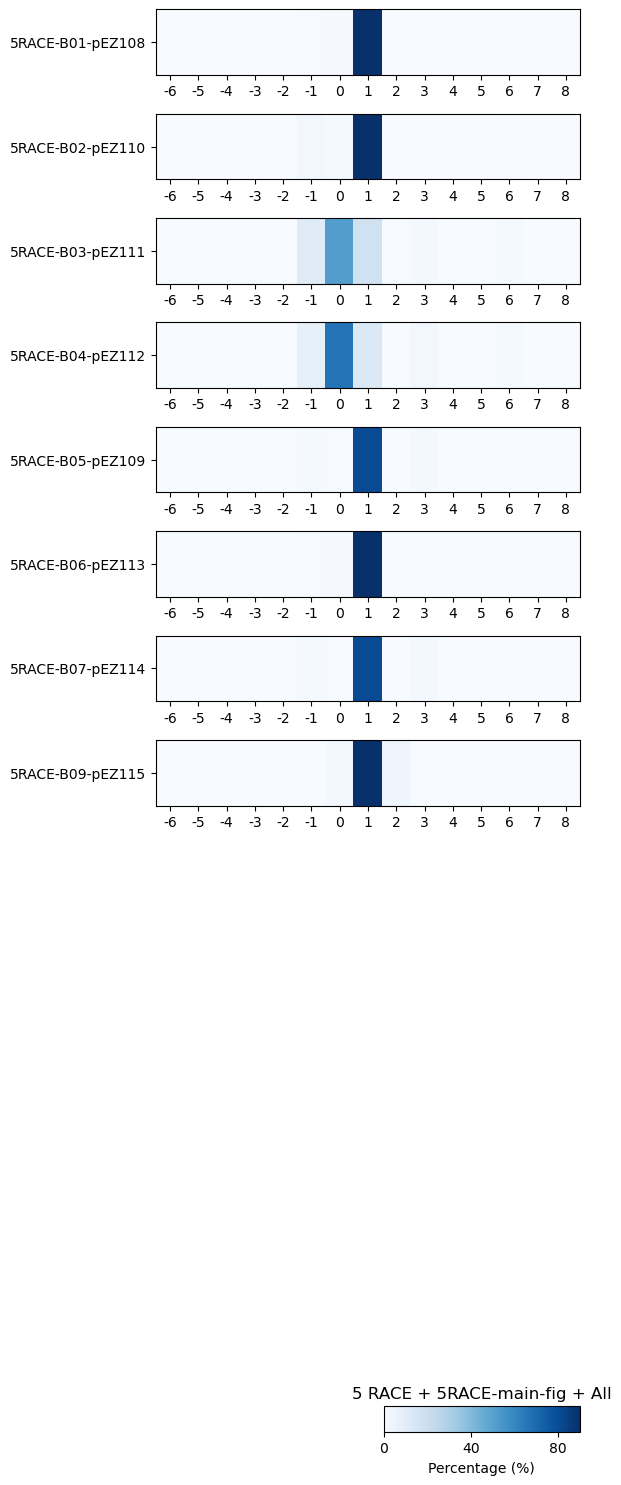

In [14]:
"""
lListOfInterest =  ['5RACE-A03-pEZ108',
                    '5RACE-A04-pEZ109',
                    '5RACE-B01-pEZ108',
                    '5RACE-B02-pEZ110',
                    '5RACE-B03-pEZ111',
                    '5RACE-B04-pEZ112',
                    '5RACE-B05-pEZ109',
                    '5RACE-B06-pEZ113',
                    '5RACE-B07-pEZ114',
                    '5RACE-B09-pEZ115']
"""
# For main figure
sUniqueIdentifier = '5RACE-main-fig'
lListOfInterest =  ['5RACE-B01-pEZ108',
                    '5RACE-B02-pEZ110',
                    '5RACE-B03-pEZ111',
                    '5RACE-B04-pEZ112',
                    '5RACE-B05-pEZ109',
                    '5RACE-B06-pEZ113',
                    '5RACE-B07-pEZ114',
                    '5RACE-B09-pEZ115']

#sFigureOfInterest = '3G' 
#sFigureOfInterest = '4G' 
sFigureOfInterest = 'All' 

# min -20 and max 10 seem ok for 5' RACE figures
nMinPos = -6
nMaxPos = 8
nColorbarMax = 90

fig = plt.figure(figsize=(6,16))

gs = gridspec.GridSpec(15,4)

nOrder = 0
for sSample in lSamples:    
    print(sSample)    

    if sSample not in lListOfInterest:
        continue
    
    dfCount_matched = dSample2CountMatched[sSample]

    dGroup2Gtype = {}
    for sGroup, dfEachGtype in dfCount_matched.groupby('5endAddedSequences'):
        
        
        lPercent = dfEachGtype['Percent'].tolist()
        lPercent = list(map(float, lPercent))
        l5endPos = dfEachGtype['5endPosition'].tolist()

        d5endPos2Percent = dict(map(lambda i,j : (i,j) , l5endPos,lPercent))
    
        lFilled5endPos = []
        lFilledPercent = []
        for i in range(nMinPos, nMaxPos+1, 1):
            
            lFilled5endPos.append(i)
            
            if i in list(d5endPos2Percent.keys()):
                lFilledPercent.append(d5endPos2Percent[i])
            else:
                lFilledPercent.append(0)
        
        dfFilled5endPosPercent = pd.DataFrame(data = lFilledPercent).T
        dfFilled5endPosPercent.columns = lFilled5endPos
        #print(dfFilled5endPosPercent)

        dGroup2Gtype[sGroup] = dfFilled5endPosPercent

    dGroup2Gtype['All'] = dGroup2Gtype['3G'] + dGroup2Gtype['4G']

    dfInterested5endPosPercent = dGroup2Gtype[sFigureOfInterest]
    ax_main = plt.subplot(gs[nOrder+1:nOrder+2,:])
    f = ax_main.pcolor(dfInterested5endPosPercent, cmap='Blues', vmin=0, vmax=nColorbarMax)

    ax_main.set_xticks(np.arange(len(lFilled5endPos))+0.5)
    ax_main.set_xticklabels(lFilled5endPos)
    ax_main.set_yticks(np.arange(1)+0.5)
    ax_main.set_yticklabels([sSample])
    
    #ax_main.set_ylabel('')

    nOrder += 1    

#make nested gridspecs for colorbar

gs_nested = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec = gs[-1:,:])
ax_color = plt.subplot(gs_nested[-1:,-1:])    
cb = Colorbar(ax=ax_color, mappable=f, orientation='horizontal')
cb.set_label('Percentage (%)')
cb.set_ticks(np.arange(0, 91, 40))
plt.title('5 RACE + {} + {}'.format(sUniqueIdentifier, sFigureOfInterest))
#plt.xlabel('3 end position of RNA')

#plt.show()
plt.tight_layout()
plt.savefig(os.path.join(sResultFolder, '5RACE_pos_main_v3.pdf'))
plt.close


5RACE-A03-pEZ108
5RACE-A04-pEZ109
5RACE-B01-pEZ108
5RACE-B02-pEZ110
5RACE-B03-pEZ111
5RACE-B04-pEZ112
5RACE-B05-pEZ109
5RACE-B06-pEZ113
5RACE-B07-pEZ114
5RACE-B09-pEZ115


<function matplotlib.pyplot.close(fig=None)>

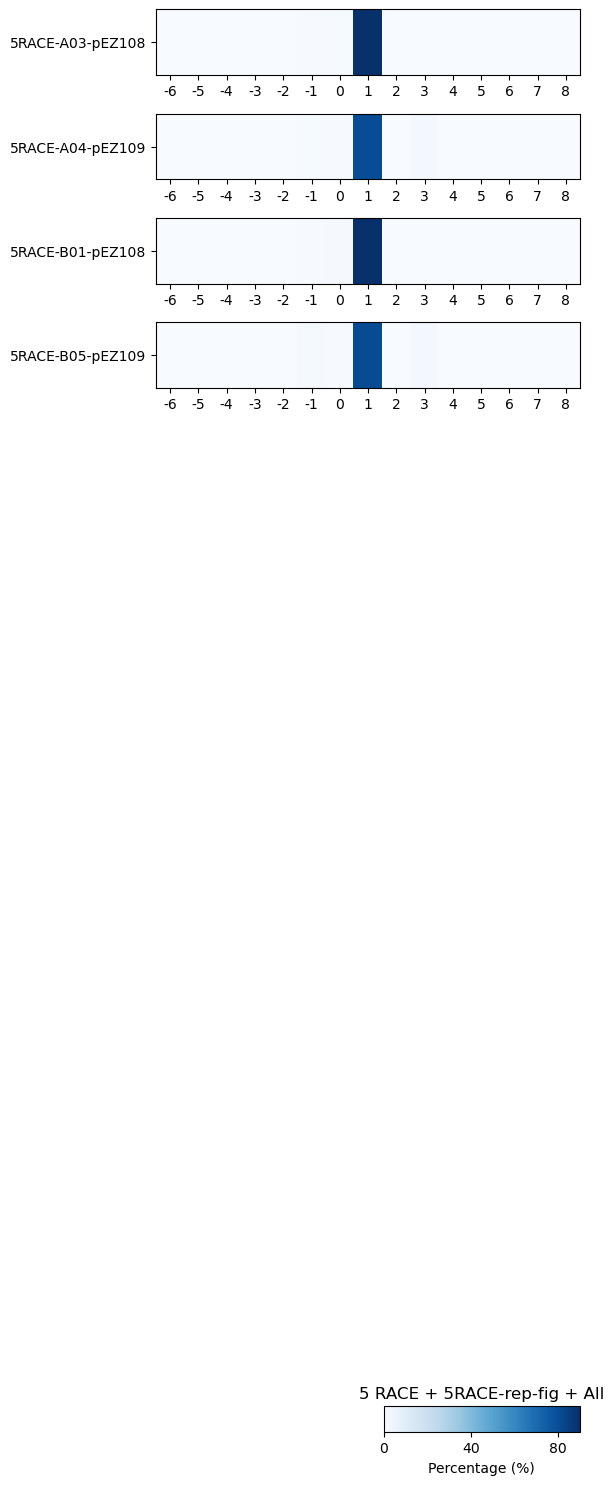

In [15]:
"""
lListOfInterest =  ['5RACE-A03-pEZ108',
                    '5RACE-A04-pEZ109',
                    '5RACE-B01-pEZ108',
                    '5RACE-B02-pEZ110',
                    '5RACE-B03-pEZ111',
                    '5RACE-B04-pEZ112',
                    '5RACE-B05-pEZ109',
                    '5RACE-B06-pEZ113',
                    '5RACE-B07-pEZ114',
                    '5RACE-B09-pEZ115']
"""
# For replicate
sUniqueIdentifier = '5RACE-rep-fig'
lListOfInterest =  ['5RACE-A03-pEZ108',
                    '5RACE-A04-pEZ109',
                    '5RACE-B01-pEZ108',                    
                    '5RACE-B05-pEZ109']

#sFigureOfInterest = '3G' 
#sFigureOfInterest = '4G' 
sFigureOfInterest = 'All' 

# min -20 and max 10 seem ok for 5' RACE figures
nMinPos = -6
nMaxPos = 8
nColorbarMax = 90

fig = plt.figure(figsize=(6,16))

gs = gridspec.GridSpec(15,4)

nOrder = 0
for sSample in lSamples:    
    print(sSample)    

    if sSample not in lListOfInterest:
        continue
    
    dfCount_matched = dSample2CountMatched[sSample]

    dGroup2Gtype = {}
    for sGroup, dfEachGtype in dfCount_matched.groupby('5endAddedSequences'):
        
        
        lPercent = dfEachGtype['Percent'].tolist()
        lPercent = list(map(float, lPercent))
        l5endPos = dfEachGtype['5endPosition'].tolist()

        d5endPos2Percent = dict(map(lambda i,j : (i,j) , l5endPos,lPercent))
    
        lFilled5endPos = []
        lFilledPercent = []
        for i in range(nMinPos, nMaxPos+1, 1):
            
            lFilled5endPos.append(i)
            
            if i in list(d5endPos2Percent.keys()):
                lFilledPercent.append(d5endPos2Percent[i])
            else:
                lFilledPercent.append(0)
        
        dfFilled5endPosPercent = pd.DataFrame(data = lFilledPercent).T
        dfFilled5endPosPercent.columns = lFilled5endPos
        #print(dfFilled5endPosPercent)

        dGroup2Gtype[sGroup] = dfFilled5endPosPercent

    dGroup2Gtype['All'] = dGroup2Gtype['3G'] + dGroup2Gtype['4G']

    dfInterested5endPosPercent = dGroup2Gtype[sFigureOfInterest]
    ax_main = plt.subplot(gs[nOrder+1:nOrder+2,:])
    f = ax_main.pcolor(dfInterested5endPosPercent, cmap='Blues', vmin=0, vmax=nColorbarMax)

    ax_main.set_xticks(np.arange(len(lFilled5endPos))+0.5)
    ax_main.set_xticklabels(lFilled5endPos)
    ax_main.set_yticks(np.arange(1)+0.5)
    ax_main.set_yticklabels([sSample])
    
    #ax_main.set_ylabel('')

    nOrder += 1    

#make nested gridspecs for colorbar

gs_nested = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec = gs[-1:,:])
ax_color = plt.subplot(gs_nested[-1:,-1:])    
cb = Colorbar(ax=ax_color, mappable=f, orientation='horizontal')
cb.set_label('Percentage (%)')
cb.set_ticks(np.arange(0, 91, 40))
plt.title('5 RACE + {} + {}'.format(sUniqueIdentifier, sFigureOfInterest))
#plt.xlabel('3 end position of RNA')
#plt.show()
plt.tight_layout()
plt.savefig(os.path.join(sResultFolder, '5RACE_pos_sup_v3.pdf'))
plt.close


<function matplotlib.pyplot.close(fig=None)>

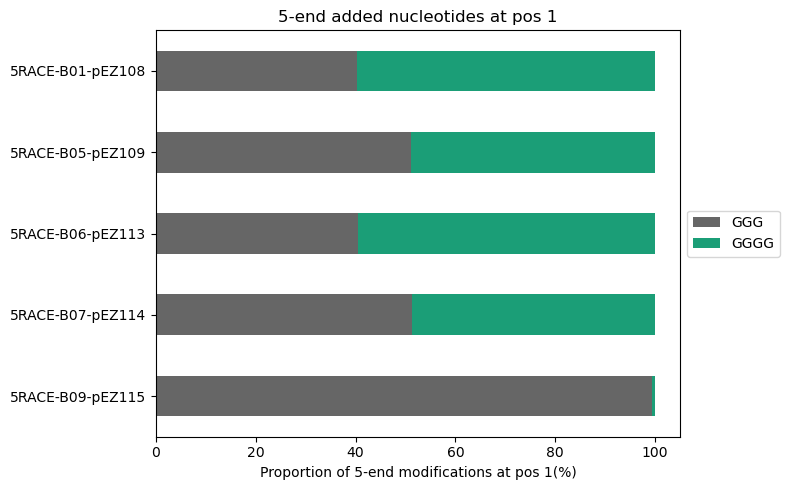

In [18]:
"""
lListOfInterest =  ['5RACE-A03-pEZ108',
                    '5RACE-A04-pEZ109',
                    '5RACE-B01-pEZ108',
                    '5RACE-B02-pEZ110',
                    '5RACE-B03-pEZ111',
                    '5RACE-B04-pEZ112',
                    '5RACE-B05-pEZ109',
                    '5RACE-B06-pEZ113',
                    '5RACE-B07-pEZ114',
                    '5RACE-B09-pEZ115']
"""
# For main figure
sUniqueIdentifier = '5RACE-main-A-starting'
lListOfInterest =  ['5RACE-B01-pEZ108',                    
                    '5RACE-B05-pEZ109',
                    '5RACE-B06-pEZ113',
                    '5RACE-B07-pEZ114',
                    '5RACE-B09-pEZ115']

l5endTypeTables = []

for sSample in lSamples:    
    #print(sSample)
    if sSample not in lListOfInterest:
        continue
    dfCount_matched = dSample2CountMatched[sSample]
    
    dfCount_matched_3G = dfCount_matched[dfCount_matched['5endAddedSequences'] == '3G']
    dfCount_matched_4G = dfCount_matched[dfCount_matched['5endAddedSequences'] == '4G']
    
    fPercent_pos0_3G = float(dfCount_matched_3G.loc[dfCount_matched_3G['5endPosition']==1, 'Percent'])
    fPercent_pos0_4G = float(dfCount_matched_4G.loc[dfCount_matched_4G['5endPosition']==1, 'Percent'])

    fRatio_pos0_3G = fPercent_pos0_3G / (fPercent_pos0_3G + fPercent_pos0_4G) *100
    fRatio_pos0_4G = fPercent_pos0_4G / (fPercent_pos0_3G + fPercent_pos0_4G) *100




    d5endType2Freq = {'GGG':fRatio_pos0_3G,
                      'GGGG':fRatio_pos0_4G}    
    df5endTypeTable = pd.DataFrame.from_dict(d5endType2Freq, orient='index', columns=[sSample])
    l5endTypeTables.append(df5endTypeTable)

dfMerged5endTypeTable = l5endTypeTables[0]
for i in range(1, len(l5endTypeTables), 1):    
    dfMerged5endTypeTable = pd.merge(dfMerged5endTypeTable, l5endTypeTables[i], how='outer', left_index=True, right_index=True)

#print(dfMerged5endTypeTable)
#print(dfMerged5endTypeTable.sum(axis=0))

#--
dfMerged5endTypeTable.T.plot(use_index=True, kind='barh', stacked=True,
                             title="5-end added nucleotides at pos 1",
                             figsize=(8,5),
                             colormap='Dark2_r')                        
plt.gca().invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Proportion of 5-end modifications at pos 1(%)')
#plt.show()

plt.tight_layout()
plt.savefig(os.path.join(sResultFolder, '5RACE_mod_main_v3.pdf'))
plt.close


<function matplotlib.pyplot.close(fig=None)>

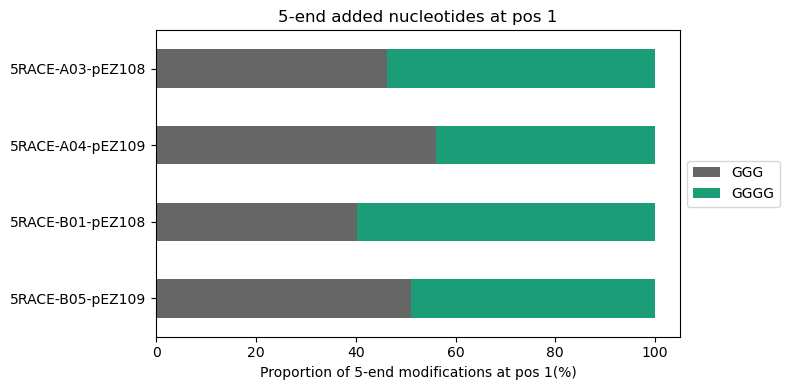

In [19]:
"""
lListOfInterest =  ['5RACE-A03-pEZ108',
                    '5RACE-A04-pEZ109',
                    '5RACE-B01-pEZ108',
                    '5RACE-B02-pEZ110',
                    '5RACE-B03-pEZ111',
                    '5RACE-B04-pEZ112',
                    '5RACE-B05-pEZ109',
                    '5RACE-B06-pEZ113',
                    '5RACE-B07-pEZ114',
                    '5RACE-B09-pEZ115']
"""
# For replicate
sUniqueIdentifier = '5RACE-rep-fig'
lListOfInterest =  ['5RACE-A03-pEZ108',
                    '5RACE-A04-pEZ109',
                    '5RACE-B01-pEZ108',                    
                    '5RACE-B05-pEZ109']

l5endTypeTables = []

for sSample in lSamples:    
    #print(sSample)
    if sSample not in lListOfInterest:
        continue
    dfCount_matched = dSample2CountMatched[sSample]
        
    dfCount_matched_3G = dfCount_matched[dfCount_matched['5endAddedSequences'] == '3G']
    dfCount_matched_4G = dfCount_matched[dfCount_matched['5endAddedSequences'] == '4G']
    
    fPercent_pos0_3G = float(dfCount_matched_3G.loc[dfCount_matched_3G['5endPosition']==1, 'Percent'])
    fPercent_pos0_4G = float(dfCount_matched_4G.loc[dfCount_matched_4G['5endPosition']==1, 'Percent'])

    fRatio_pos0_3G = fPercent_pos0_3G / (fPercent_pos0_3G + fPercent_pos0_4G) *100
    fRatio_pos0_4G = fPercent_pos0_4G / (fPercent_pos0_3G + fPercent_pos0_4G) *100




    d5endType2Freq = {'GGG':fRatio_pos0_3G,
                      'GGGG':fRatio_pos0_4G}    
    df5endTypeTable = pd.DataFrame.from_dict(d5endType2Freq, orient='index', columns=[sSample])
    l5endTypeTables.append(df5endTypeTable)

dfMerged5endTypeTable = l5endTypeTables[0]
for i in range(1, len(l5endTypeTables), 1):    
    dfMerged5endTypeTable = pd.merge(dfMerged5endTypeTable, l5endTypeTables[i], how='outer', left_index=True, right_index=True)

#print(dfMerged5endTypeTable)
#print(dfMerged5endTypeTable.sum(axis=0))

#--
dfMerged5endTypeTable.T.plot(use_index=True, kind='barh', stacked=True,
                             title="5-end added nucleotides at pos 1",
                             figsize=(8,4),
                             colormap='Dark2_r')                        
plt.gca().invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Proportion of 5-end modifications at pos 1(%)')
#plt.show()

plt.tight_layout()
plt.savefig(os.path.join(sResultFolder, '5RACE_mod_sup_v3.pdf'))
plt.close
